#AutoCorrelação

##Importar Libs

Atualizar para a última versão do plotly

In [ ]:
!pip install plotly --upgrade

In [23]:
import numpy as np                                              #Manipulações Matemáticas
import pandas as pd                                             #Manipulações de DataFrames e Séries
import plotly.express as px                                     #Criação de Gráficos Interativos
import matplotlib.pyplot as plt                                 #Manipulações Gráficas
import statsmodels.api as sm                                    #Importação de Dataset de Manchas Solares
from matplotlib.pylab import rcParams                           #Manipulação de parâmetros de gráficos do matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   #Criação de Gráficos de AutoCorrelação

Ajustando tamanho da figura dos gráficos do matplotlib

In [24]:
rcParams['figure.figsize'] = 15, 6

##Primeiro Caso: Série Aleatória

Série aleatória normalizada com valores mensais entre 1970 à 1975

###Criação da Série

Criar série aleatória baseada em:

* Média = 0
* Desvio Padrão = 1
* Quantidade Valores = 72

In [33]:
np.random.seed(6)
dados1 = np.random.normal(0, 1, 72)
dados1

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

Criação do índice

In [51]:
indice1 = pd.date_range('1970-01', periods=len(dados1), freq='M')
indice1

DatetimeIndex(['1970-01-31', '1970-02-28', '1970-03-31', '1970-04-30',
               '1970-05-31', '1970-06-30', '1970-07-31', '1970-08-31',
               '1970-09-30', '1970-10-31', '1970-11-30', '1970-12-31',
               '1971-01-31', '1971-02-28', '1971-03-31', '1971-04-30',
               '1971-05-31', '1971-06-30', '1971-07-31', '1971-08-31',
               '1971-09-30', '1971-10-31', '1971-11-30', '1971-12-31',
               '1972-01-31', '1972-02-29', '1972-03-31', '1972-04-30',
               '1972-05-31', '1972-06-30', '1972-07-31', '1972-08-31',
               '1972-09-30', '1972-10-31', '1972-11-30', '1972-12-31',
               '1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31',
               '1973-09-30', '1973-10-31', '1973-11-30', '1973-12-31',
               '1974-01-31', '1974-02-28', '1974-03-31', '1974-04-30',
               '1974-05-31', '1974-06-30', '1974-07-31', '1974-08-31',
      

Criação da Série

In [53]:
serie1 = pd.Series(dados1, index=indice1)

###Gráfico da Série

In [54]:
fig = px.line(x = serie1.index, y = serie1.values)

fig.update_layout(
    title = "Média de Manchas Solares Mensais de 1970 à 1975",
    xaxis_title = "Anos",
    yaxis_title = "Valores")
fig.show()

###ACF (Sequencial)

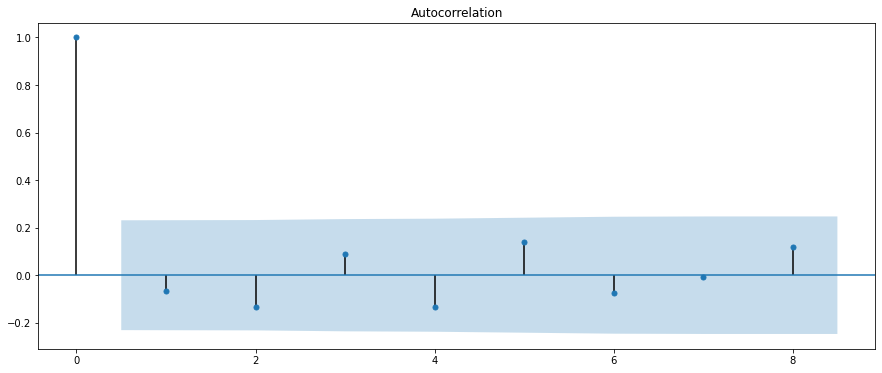

In [55]:
plot_acf(serie1, lags=8)
plt.show()

A maioria dos dados está dentro da zona de confiança, não existe uma autoCorrelação significante.

###PACF (Aleatório)

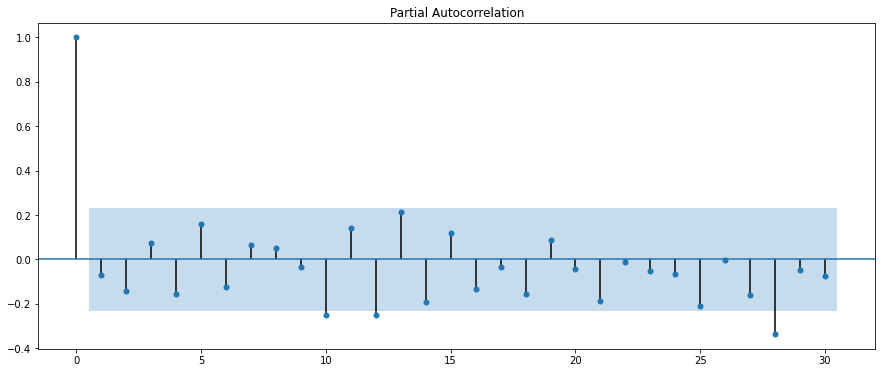

In [56]:
plot_pacf(serie1, lags=30)
plt.show()

A maioria dos dados está dentro da zona de confiança, não existe uma autoCorrelação significante.

##Segundo Caso: Dados Externos de Manchas Solares

Número médio mensal de manchas solares relativas de 1749 à 1983 coletados no Observatório Federal Suíço de Zurique até 1960 e depois no Observatório Astronômico de Tóquio.

###Criação da Série

Importando Base de dados

In [37]:
dados2 = pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/sunspots.csv')
dados2.columns = ['valores']
dados2.head()

,valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


Excluir índices anteriores (O índice iniciou no número 1 ao invés do 0)

In [38]:
dados2 = dados2.reset_index(drop=True) 

Dados mensais, criar índice baseado em meses referentes ao período

In [39]:
indice = pd.date_range('1749', periods=len(dados2), freq='M')
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

Criar Série

In [40]:
serie2 = pd.Series(dados2['valores'].values, index = indice)

###Gráfico da Série

In [41]:
fig = px.line(x = serie2.index, y = serie2.values)

fig.update_layout(
    title = "Média de Manchas Solares Mensais de 1749 à 1983",
    xaxis_title = "Anos",
    yaxis_title = "Valores")
fig.show()

###ACF (Sequencial)

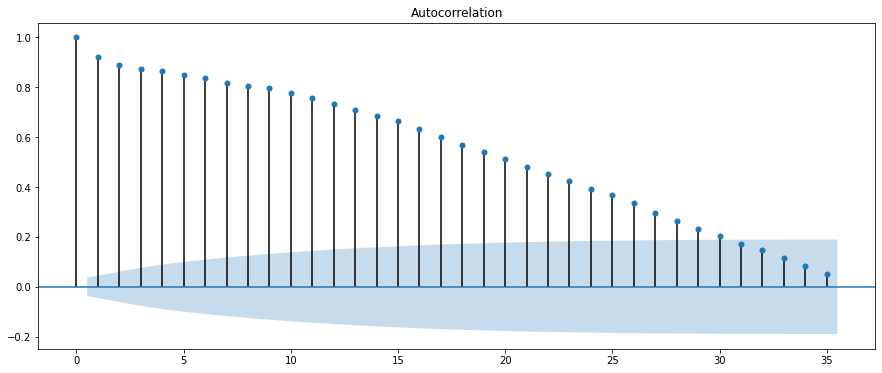

In [42]:
plot_acf(serie2)
plt.show()

Muitos Lags fora da zona de confiança (Alta AutoCorrelação tanto positiva)

###PACF (Aleatória)

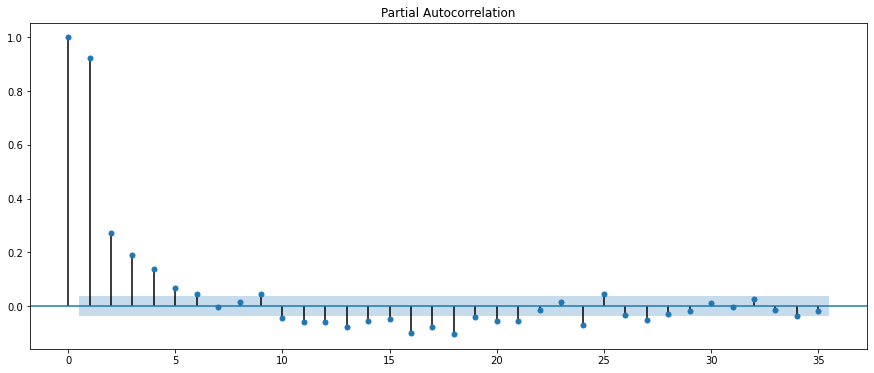

In [43]:
plot_pacf(serie2)
plt.show()

Muitos Lags fora da zona de confiança (Alta AutoCorrelação tanto positiva como negativa)

##Terceiro Caso: Dados do Python sobre Manchas Solares

Dados anuais (1700-2008) sobre manchas solares. Fonte: National Geophysical Data Center

###Criação da Série

Importando base de dados

In [44]:
manchas_solares = sm.datasets.sunspots.load_pandas()['data']
manchas_solares.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


Criando a série

In [45]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index=manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

###Gráfico da Série

In [46]:
fig = px.line(x = serie3.index, y = serie3.values)

fig.update_layout(
    title = "Média de Manchas Solares Anuais de 1700 à 2008",
    xaxis_title = "Anos",
    yaxis_title = "Valores")
fig.show()

###ACF (Sequencial)

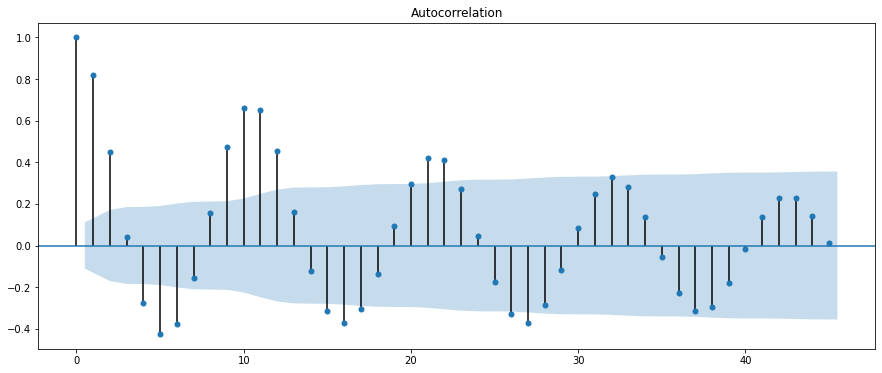

In [47]:
plot_acf(serie3, lags=45)
plt.show()

Muitos Lags fora da zona de confiança (Alta AutoCorrelação tanto positiva como negativa)

###PACF (Aleatória)

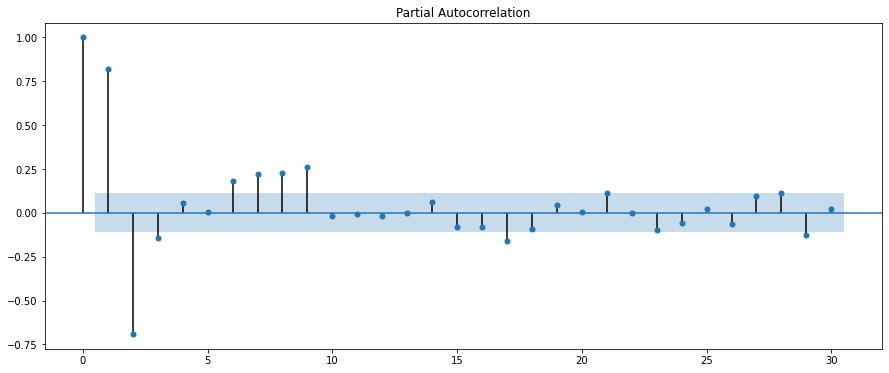

In [48]:
plot_pacf(serie3, lags=30)
plt.show()

Muitos Lags fora da zona de confiança (Alta AutoCorrelação positiva)